In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets
from torchvision import transforms 

import matplotlib.pyplot as plt

from torch.utils.data import dataloader

C:\Users\Aditya Gupta\Anaconda\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
class NN_Model(nn.Module):
    
    # Constructor
    def __init__(self, In, H, Out):
        super(NN_Model, self).__init__()
        self.linear1 = nn.Linear(In, H)
        self.linear2 = nn.Linear(H, Out)

    # Prediction    
    def forward(self, x):
        x = torch.tanh(self.linear1(x))  
        x = self.linear2(x)
        return x

In [3]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    training_loss=[]
    validation_accuracy=[]
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader): 
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #loss for every iteration
            training_loss.append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            #validation 
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_data))
        validation_accuracy.append(accuracy)
    return training_loss,validation_accuracy

In [4]:
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [5]:
validation_data = datasets.MNIST(root='./data', download=True, transform=transforms.ToTensor())

In [6]:
criterion = nn.CrossEntropyLoss()

In [7]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=2000)
validation_loader = torch.utils.data.DataLoader(dataset=validation_data, batch_size=5000)

In [8]:
model = NN_Model(784,100,10)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)
training_results

([2.3181586265563965,
  2.314629316329956,
  2.3133814334869385,
  2.304887056350708,
  2.300772190093994,
  2.299633741378784,
  2.2949295043945312,
  2.2902655601501465,
  2.2867846488952637,
  2.285442352294922,
  2.2790932655334473,
  2.2775168418884277,
  2.2742817401885986,
  2.2631685733795166,
  2.2608742713928223,
  2.2642853260040283,
  2.2601475715637207,
  2.257539987564087,
  2.2500224113464355,
  2.2466533184051514,
  2.2461843490600586,
  2.2384836673736572,
  2.236384391784668,
  2.2322003841400146,
  2.2311902046203613,
  2.223412036895752,
  2.221930742263794,
  2.218184471130371,
  2.2093613147735596,
  2.2010748386383057,
  2.210416316986084,
  2.203098773956299,
  2.1991024017333984,
  2.1966171264648438,
  2.1884095668792725,
  2.1871423721313477,
  2.1891324520111084,
  2.188650131225586,
  2.1845362186431885,
  2.1764392852783203,
  2.167921304702759,
  2.1743357181549072,
  2.167794942855835,
  2.159590005874634,
  2.1542911529541016,
  2.1683781147003174,
  2.

In [84]:
test_data=pd.read_csv('test.csv')
test_data['Label']=np.nan

In [85]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [86]:
for i in range(test_data.shape[0]):
    val=test_data.iloc[i,:784]
    val=torch.tensor(val.values,dtype=torch.int)
    val=val.view(-1,28*28)
    val=val.float()
    pred=model(val)
    pred=torch.argmax(pred)
    pred=int(pred)
    test_data.iloc[i,784]=pred

2


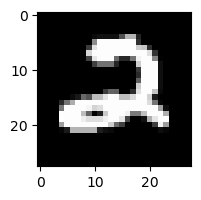

0


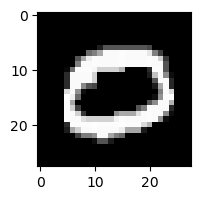

9


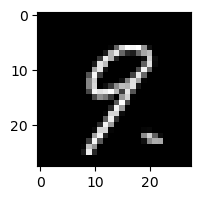

4


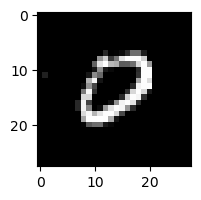

2


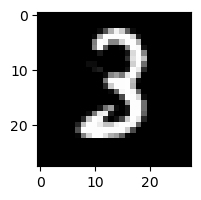

7


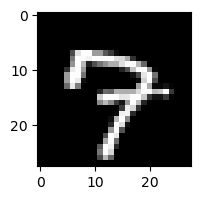

0


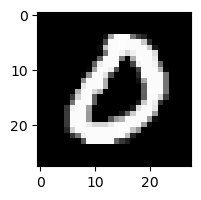

3


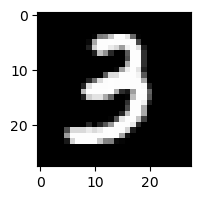

0


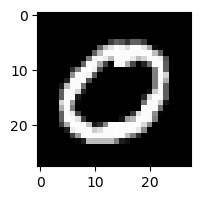

3


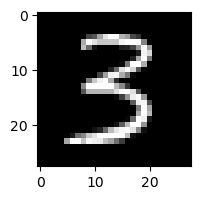

In [87]:
for i in range(10):
    plt.figure(figsize=(2,2))
    plt.imshow(test_data.iloc[i,:784].values.reshape(28, 28), cmap='gray')
    print(int(test_data.iloc[i,784]))
    plt.show()